# Контекст
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты

## Приоритизация гипотез

In [35]:
# загружаем все библиотеки, нужные дял дальнейшей работы 
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np

hypothesis = pd.read_csv('/datasets/hypothesis.csv') #импортируем файл csv с гипотезами

hypothesis.columns = [x.lower() for x in hypothesis.columns] # перевожу в нижний регистр все названия заголовков

display(hypothesis)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
# применяем метод ICE для приоритизация гипотез
hypothesis['ICE'] = hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']

# применяем метод RICE для приоритизация гипотез
hypothesis['RICE'] = hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']

display(hypothesis.sort_values(by='ICE',ascending=False))

display(hypothesis.sort_values(by='RICE',ascending=False))

pd.set_option('max_colwidth', 300) # расширяем столбцы, чтобы видеть полное наименование гипотез


,hypothesis,reach,impact,confidence,efforts,ICE,RICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


### Вывод
   - мы импортировали все необходимые библитеки
   - загрузили данные по существующим гипотезам и их компонентам (R,I,C,E)
   - использовали два метода для оценки приоритизации гипотез ICE, RICE
   - При методе ICE  в приоритете оказались гипотезы: 8,0,7,6. При методе RICE  в приоритете оказались гипотезы: 7,2,0,6
    8 гипотезы потерялала приоритет из-за очень низконо охвата аудитории(1),2 появилась благодаря высокому охвату в 8, хотя         влияние, затронувшее 3х пользователей явно невысокое.
   

##  Анализ A/B-теста

In [4]:
# выгружаем данные по заказам пользоваталей и информацию о посетителях магазина

orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

# проверяем данные на форматы
orders.info()
print()
visitors.info()

dfs = [orders,visitors]

# переводи данные столбца "date" в нужный формат
for df in dfs:
    df['date'] = df['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
     )


# проверяем на наличие отрицательных значений

def find_num_cols(df):
    numerical_columns = [c for c in df.columns if df[c].dtype.name =='int64'] # выбираем только столбцы с количественными данными	
    return numerical_columns

for df in dfs:
    numeric = find_num_cols(df)# список столбцов с количественными данными присваивается переменной 'numeric'
    for i in numeric:
        df[i] = df[i].abs()
print()
        
# проверка на дубликаты
for df in dfs:
    print('Кол-во дубликатов: ',df.duplicated().sum())

# проверяем категориальные столбцы на неочевидные пропукси и дубликаты
def find_cat_cols(df):
    categorial_columns = [c for c in df.columns if df[c].dtype.name == 'object'] #выбираем только столбцы с категориальными данными
    return categorial_columns

for df in dfs:
    categorial = find_cat_cols(df)
    for i in categorial:
        print(df[i].unique())      
        
display(orders.head(5))
print()
display(visitors.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB

Кол-во дубликатов:  0
Кол-во дубликатов:  0
['B' 'A']
['A' 'B']


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [5]:

orders_a = orders.groupby('date').agg({'visitorId':'nunique'}).sum()
print(orders_a)
orders_b= len(orders['visitorId'].unique())
print(orders_b)


visitorId    1148
dtype: int64
1031


### График кумулятивной выручки по группам

In [6]:
# проверим на наличие пользователей попавших в обе группы

usersA = orders[orders['group']=="A"].groupby('visitorId').agg({'visitorId':'first'})
usersA.columns=['id']
usersB = orders[orders['group']=="B"].groupby('visitorId').agg({'visitorId':'first'})
usersB.columns=['id']

abusers = (pd.concat([usersA,usersB],axis=0))# кол-во общих пользователей на 2 группы
abusers = abusers[abusers.duplicated()]['id'].tolist()
print(abusers)
orders = orders.query('visitorId not in @abusers')
orders.info()

[8300375, 199603092, 232979603, 237748145, 276558944, 351125977, 393266494, 457167155, 471551937, 477780734, 818047933, 963407295, 1230306981, 1294878855, 1316129916, 1333886533, 1404934699, 1602967004, 1614305549, 1648269707, 1668030113, 1738359350, 1801183820, 1959144690, 2038680547, 2044997962, 2378935119, 2458001652, 2579882178, 2587333274, 2600415354, 2654030115, 2686716486, 2712142231, 2716752286, 2780786433, 2927087541, 2949041841, 2954449915, 3062433592, 3202540741, 3234906277, 3656415546, 3717692402, 3766097110, 3803269165, 3891541246, 3941795274, 3951559397, 3957174400, 3963646447, 3972127743, 3984495233, 4069496402, 4120364173, 4186807279, 4256040402, 4266935830]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   da

In [7]:
import matplotlib.pyplot as plt #импортируем библиотеку для построения графиков

# строим по сырым данным

datesGroups = orders[['date','group']].drop_duplicates() 

# кумулятивные данные по заказам
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 

# кумулятивные данные по посетителям
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(datesGroups.head(5)) 


         date group
0  2019-08-15     B
7  2019-08-15     A
45 2019-08-16     A
47 2019-08-16     B
55 2019-08-01     A


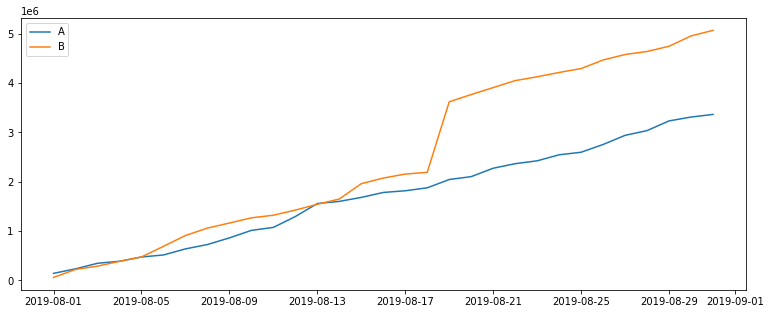

In [9]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.rcParams['figure.figsize'] = (13,5)

plt.legend() 

#### Выводы
    - Судя по графику кумулятивной выручки, выручки в обеих группа увеличиваются в течение всего периода
    - Выручка в группе B изначально растет равномерно и превосходит выручку А незначительно, но примерно на середине периода       - наблюдается резкий скачок (резкий рост заказов или(и) среднего чека) после чего выручка группы B вырывается в лидеры с       - заметным отрывом

###  График кумулятивного среднего чека по группам

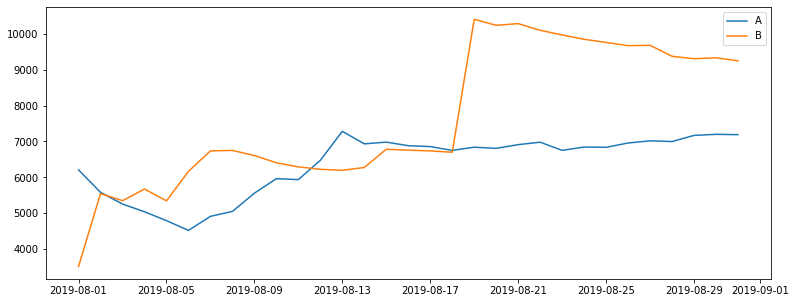

In [10]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 

#### Выводы
     - Средние чеки на первый взгляд стабилизировались и следуют по схожим траекториям, ближе в концу теста,но
     - где-то в середине периода в группе B наблюдается значимое увеличение среднего чека, чье влияние значительно, 
     - данные еще далеки от стабилизации,
     - делать вывод рано

### График относительного изменения кумулятивного среднего чека группы B к группе A. 

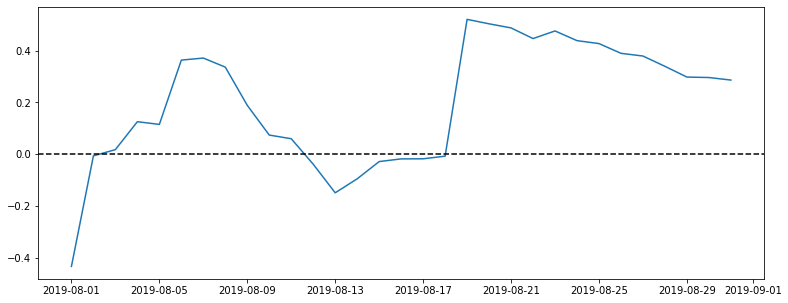

In [11]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

#### Вывод
     - пока сложно сделать выводы о среднем чеке, так как на графике данные колеблются, а резкие скачки скорее 
     - свидетельствуют о каких-то крупных заказах

### Постройте график кумулятивной конверсии по группам

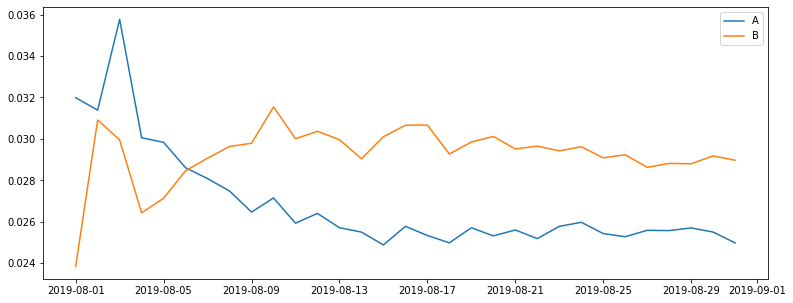

In [20]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()


#### Выводы
- В начале теста конверсия еще не установилась, далее с существенным отрывом вперед вырвалась группа B и конверсия установилась
  на фиксированном уровне.
- Очевидно превосходство группы В, со стабильным установившимя отрывом от группы А. Есть  тренд на снижение ближе к концу теста,
- но, судя по графику, он объясняется небольшой цикличностью, присущей обеим группам.

### Постройте график относительного изменения кумулятивной конверсии группы B к группе A 

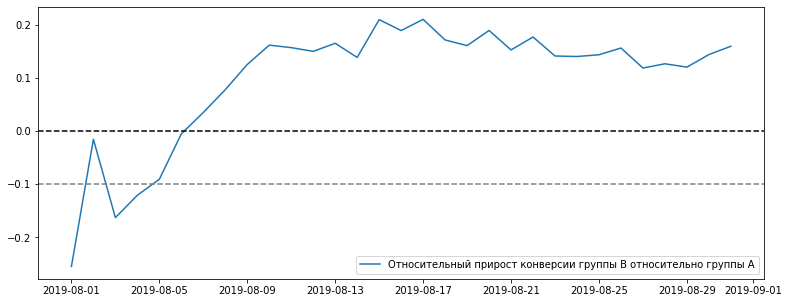

In [25]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')

#### Вывод
     - С середины теста отличие конверсии группы B относительно конверсии группы A снижается и, возможно,
     - уже стабилизировалось.

### Постройте точечные графики количества заказов и стоимости заказа по пользователям. Определите 95 и 99 перцентили для подсчета границы

(0.0, 8.0)

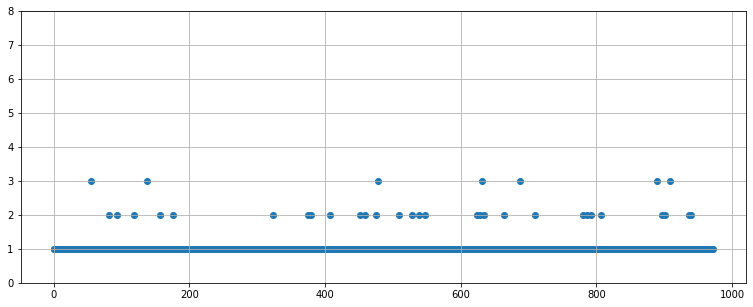

In [26]:
# оценим кол-во заказов на пользователя

orders_per_user = orders.groupby('visitorId', as_index=False).agg({'transactionId':pd.Series.nunique})
orders_per_user.columns = ['buyers','orders']
orders_per_user.sort_values(by='orders')

x_values = pd.Series(range(0,len(orders_per_user['orders'])))
plt.scatter(x_values, orders_per_user['orders']) 
plt.grid() # добавили сетку
plt.ylim(0,8)

In [27]:
# так как принято убирать 1-5% наблюдений с крайними значениями, то посчитаем перцентили

print(np.percentile(orders_per_user['orders'],[95,99]))

[1. 2.]


(0.0, 200000.0)

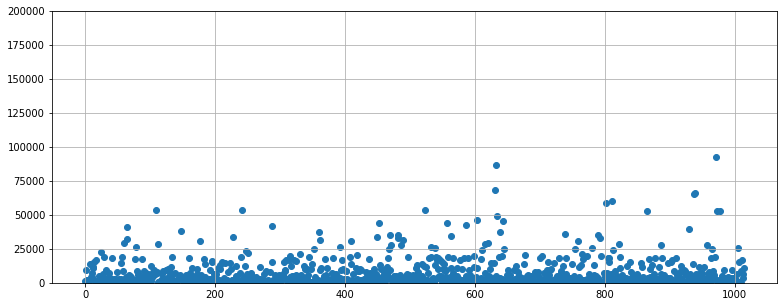

In [28]:
# оценим стоимость заказов на пользователя

x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.grid() # добавили сетку
plt.ylim(0,200000)


In [29]:
# так как принято убирать 1-5% наблюдений с крайними значениями, то посчитаем перцентили

print(np.percentile(orders['revenue'],[95,99]))

[26785. 53904.]


#### Выводы
- судя по точечному графику основная масса заказов на одного пользователя расположена в районе до 4 заказов
- посчитаем более точно и посмотрим перцентили 95 и 99 - 1 и 2 заказа соответственно. Не более 5% пользователей
- размещали более 1 заказов и не более 1% 2 заказа. Выберем границу в 2 заказа, а остальные отсеем.

- судя по точечному графику в основном стоимость заказов на одного пользователя расположена в диапозоне до 100000
- среди нескольких дорогих заказов два экстремально дорогих, один из которых на миллион
- посчитаем более точно и посмотрим перцентили 95 и 99 - 28 000 и 58 233 соответственно. Не более 5% пользователей
- размещали заказаы на сумму больше 27 000 и не более 1% - на сумму 54 000. Выберем границу в 30 000, а остальные отсеем.


### Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным

In [30]:
# подготовим исходные данные

# просчитаем кумулятивное кол-во посетителей по дням для каждой из групп
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

visitorsADaily = visitorsADaily.groupby('date').agg({})

ValueError: No objects to concatenate

In [31]:
# посчитаем кумулятивное кол-во заказов для каждой из групп

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

In [32]:
# делаем общую таблицу по всем ранее полученнм данным с кумулятивными метриками

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5)) 

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


In [33]:
# считаем кол-во заказов на пользователя каждой группы
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 
display(ordersByUsersB)

,userId,orders
0,5114589,1
1,6958315,1
2,39475350,1
3,47206413,1
4,48147722,1
...,...,...
523,4251115836,1
524,4258103007,1
525,4279090005,1
526,4281247801,1


In [34]:
# зададим переменные для дальнейшего расчета конверсии, т. е помимо кол-ва пользователей мы добавляем кол-во посетителей
# c нулевыми заказами

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

In [36]:
# применим U-критерий Манна-Уитни для выборок распределенных ненормально (т. е потенциально с выбросами). Пока данные сырые, от 
# крайних значений неочищены

# выдвинем нулевую гипотезу о равенсте конверсий в обеих группах, альтернативная гипотеза - конверсии в группах отличаются

alpha = 0.05  # критический уровень статистической значимости

pvalue = stats.mannwhitneyu(sampleA, sampleB)[1]

print('p-значение: {0:.3f}'.format(pvalue))

if pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 



print('Относительная разница конверсий группы B по отношению к А: {0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))

p-значение: 0.011
Отвергаем нулевую гипотезу: разница статистически значима
Относительная разница конверсий группы B по отношению к А: 0.160


#### Выводы
     - расхождение почти в 16% в конверсии в пользу группы В подтверждается pvalue 0.006 меньше статистически значимых 5%.
     - т. е мы отвергаем гипотезу о равенстве конверсий, вероятность того, что мы получим такие цифры по конверсии при               - равенстве групп менее 5%
     

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

In [37]:
# выдвинем нулевую гипотезу о равенсте средних чеков в обеих группах

alpha = 0.05  # критический уровень статистической значимости

pvalue = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]

print('p-значение: {0:.3f}'.format(pvalue))

if pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 



print('Относительная разница средних чеков группы B по отношению к А: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))



p-значение: 0.829
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Относительная разница средних чеков группы B по отношению к А: 0.287


#### Выводы
    - Средний чек группы B значительно выше среднего чека группы А на 28.7%, но p-value 0.415 значительно выше 0.05, следовательно причин считать, что есть различия в чеках нет. Возможно, это ложнонегативный результат, обусловленный выбросами (внезапным скачком среднего чека в тесте, который еще не стабилизироваля. Очистим данные от крайних значений, чтобы можно было сделать более надежные выводы
    

### Посчитайте статистическую значимость различий в конверсии  и среднем чеке между группами по «очищенным» данным

In [38]:
# посчитаем статистическую значимость сначала для конверсии

# создаем таблицу с абнормальными данными по 2-м признакам( т. е теми, что содержат крайние значения по конверсии и среднему чеку,
# границы мы определили  в главе 2.6.1)

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 54000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape) 

print(len(ordersByUsersA))# границы были определены в пункте 2.6.1 . Берем 99 перцентилей для среднего чека и аналогично для конверсии

print(len(ordersByUsersB))

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
dtype: int64
(16,)
445
528


In [39]:
# очищаем ранее полученные данные для анализа коневрсии от абнормальных юзеров для расчета конверсии



sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [40]:
# применим статистический критерий Манна-Уитни к полученным выборкам для оценки равенства конверсий по очищенным данным
# выдвинем нулевую гипотезу о равенсте конверсий в обеих группах

alpha = 0.05  # критический уровень статистической значимости

pvalue = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]

print('p-значение: {0:.3f}'.format(pvalue))

if pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 



print('Относительная разница конверсий группы B по отношению к А: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 



p-значение: 0.007
Отвергаем нулевую гипотезу: разница статистически значима
Относительная разница конверсий группы B по отношению к А: 0.189


In [41]:
# применим статистический критерий Манна-Уитни к полученным выборкам для оценки равенства средних чеков по очищенным данным

# выдвинем нулевую гипотезу о равенсте средних чеков в обеих группах

alpha = 0.05  # критический уровень статистической значимости

pvalue =(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
)
    

print('p-значение: {0:.3f}'.format(pvalue))

if pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

    
print('Относительная разница средних чеков группы B по отношению к А: {0:.3f}'.format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
)
     )
    

p-значение: 0.788
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Относительная разница средних чеков группы B по отношению к А: -0.032


#### Выводы
     - относительная разница в конверсии группы B перманентно лучше на протяжении всего теста. Разница в 18.9% достаточно               большая. по очищенным данным pvalue = 0.004 значительно ниже уровня статистической значимости 0.05, что дает основание отвергнуть гипотезу о равенстве
     - после того, как мы удалили даже незначительные выбросы по верхней границе в 54 000 (т. е выбрав 99 перцентилей) и аналогично по границе 4 заказа уже минимизировали ту разницу, что мы наблюдали ранее в средних чеках (было 28.7% - стало -3%, вероятность гипотезы о равенстве стала чуть меньше с 41.5% до 39.4%
     - судя по графику и критериям значимости до и после очищения данных, а также минимальной относительной разницы после очистки, я бы сказала, что однозначно делать выводы о среднем чеке нельзя.
     

## Вывод
   - Судя по графику кумулятивной выручки, выручки в обеих группа увеличиваются в течение всего периода
   - Выручка в группе B изначально растет равномерно и превосходит выручку А незначительно, но примерно на середине периода        - наблюдается резкий скачок (резкий рост заказов или(и) среднего чека) после чего выручка группы B вырывается в лидеры с        - заметным отрывом
   - Средние чеки на первый взгляд стабилизировались и следуют по схожим траекторим, ближе в концу теста,но
   - Где-то в середине периода в группу B наблюдается значимое увеличение среднего чека, чье влияние может значительное влияние    на среднее, еще не показывающее реальный результат после скачка 
   - В начале теста конверсия еще не установилась, далее с существенным отрывом вперед вырвалась группа B и конверсия              установилась на фиксированном уровне.
   - Очевидно превосходство группы В, со стабильным установившимя отрывом от группы А. Есть  тренд на снижение ближе к концу      теста, но, судя по графику, он объясняется небольшой цикличностью, присущей обеим группам.
   
   
   - По сырым данным расхождение почти в 16% в конверсии в пользу группы В подтверждается pvalue 0.006 меньше статистически        значимых 5%.
   - т. е мы отвергаем гипотезу о равенстве конверсий, вероятность того, что мы получим такие цифры по конверсии при равенсте      групп менее 5%
   - Средний чек группы B значительно выше среднего чека группы А на 28.7%, но p-value 0.415 значительно выше 0.05, следовательно    причин считать, что есть различия в чеках нет. Возможно, это ложнонегативный результат, обусловленный выбросами (внезапным      скачком среднего чека в тесте, который еще не стабилизироваля. Очистим данные от крайних значений, чтобы можно было сделать    более надежные выводы
   
   
  - Далее мы очистили данные,удалив даже незначительные выбросы по верхней границе в 54 000 для среднего чека      (т. е         выбрав 99 перцентилей) и  по границе в 2 заказа для заказов на пользователя
  - По очищенным данным мы наблюдаем разницу по среднему чеку только в -3% (было 28.7%), вероятность гипотезы о равенстве         стала с 41.5% до 39.4%
  - судя по графику и критериям значимости до и после очищения данных, а также минимальной относительной разницы после           очистки, я бы сказала, что однозначно делать выводы о среднем чеке нельзя.
  - относительная разница в конверсии группы B перманентно лучше на протяжении всего теста. Разница в 19%(было 16%) достаточно   большая. по очищенным данным pvalue = 0.004(было 0.006) значительно ниже уровня статистической значимости 0.05, что дает       основание отвергнуть гипотезу о равенстве.
  
  
  - Рекомендации: остановить тест, так как результаты группы B лучше
  -а) результаты теста стабилизировались,судя по стабилизации конверсии
  -б) результаты группы B гораздо лучше по одной из метрик-конверсии
  -в) результаты конверсии группы B лучше на 19% с высокой степенью вероятности 
  -г) средний чек по очищенным данным незначительно хуже 3%, но такое небольшое падение в среднем чеке копменсируется значительным превосходством в конверсии
   